## Machine Learning Course - Group Assignment - Black Friday Sales Prediction

### Group 16
* Nakul Ghate
* Juraj Polakovic
* Nima Sajedi
* Jana Taha
* Faider Florez Valencia



### Objectives and goals:
* Build ML models which will help store to predict the amount of purchase based on customer purchase trends for different products.


## Libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Dataset

* The dataset we are going to use is the Black Friday dataset from Kaggle which contains about 550068 rows and 12 features that can be downloaded <a href="https://www.kaggle.com/sdolezel/black-friday">here</a>.

* Problem: Supervised Regression type.

#### Attributes:
| Column ID |         Column Name        | Data type |           Description           | Masked |
|:---------:|:--------------------------:|:---------:|:-------------------------------:|--------|
|     0     |           User_ID          |   int64   |      Unique Id of customer      | False  |
|     1     |         Product_ID         |   object  |       Unique Id of product      | False  |
|     2     |           Gender           |   object  |         Sex of customer         | False  |
|     3     |             Age            |   object  |         Age of customer         | False  |
|     4     |         Occupation         |   int64   |   Occupation code of customer   | True   |
|     5     |        City_Category       |   object  |         City of customer        | True   |
|     6     | Stay_In_Current_City_Years |   object  | Number of years of stay in city | False  |
|     7     |       Marital_Status       |   int64   |    Marital status of customer   | False  |
|     8     |     Product_Category_1     |   int64   |       Category of product       | True   |
|     9     |     Product_Category_2     |  float64  |       Category of product       | True   |
|     10    |     Product_Category_3     |  float64  |       Category of product       | True   |
|     11    |          Purchase          |   int64   |         Purchase amount         | False  |

In [6]:
# Datasets Imports
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Step 1: Data - Descriptive analysis

In [7]:
# Training dataset check
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [8]:
# Testing dataset check
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [9]:
# Training dataset shape
print('Training data: \nRows: {} Columns: {}'.format(train.shape[0], train.shape[1]))

Training data: 
Rows: 550068 Columns: 12


In [11]:
# Testing dataset shape
print('Testing data: \nRows: {} Columns: {}'.format(test.shape[0], test.shape[1]))

Testing data: 
Rows: 233599 Columns: 11


In [12]:
# Features data-type check
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [13]:
# Null values check
round((train.isnull().sum() / train.shape[0]) * 100, 2).astype(str) + ' %'

User_ID                         0.0 %
Product_ID                      0.0 %
Gender                          0.0 %
Age                             0.0 %
Occupation                      0.0 %
City_Category                   0.0 %
Stay_In_Current_City_Years      0.0 %
Marital_Status                  0.0 %
Product_Category_1              0.0 %
Product_Category_2            31.57 %
Product_Category_3            69.67 %
Purchase                        0.0 %
dtype: object

In [14]:
# Statistics check
train.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


In [11]:
# Stay_In_Current_City_Years feature - Unique values counts check
round((train['Stay_In_Current_City_Years'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

1     35.24 %
2     18.51 %
3     17.32 %
4+     15.4 %
0     13.53 %
Name: Stay_In_Current_City_Years, dtype: object

In [16]:
# AGE feature - Unique values counts check
round((train['Age'].value_counts(normalize = True).mul(100)), 2).astype(str) + ' %'

26-35    39.92 %
36-45     20.0 %
18-25    18.12 %
46-50     8.31 %
51-55      7.0 %
55+       3.91 %
0-17      2.75 %
Name: Age, dtype: object

### Checkpoint
* 'Product_Category_2' contains 31.57% null values which can be imputed 
* 'Product_Category_3' contains 69.67% null values so we can drop this feature.
* 'Age' and 'Stay_In_Current_City_Years' contain some values which will need to be taken care of (+ signs) 

## Data - Exploratory  Analysis

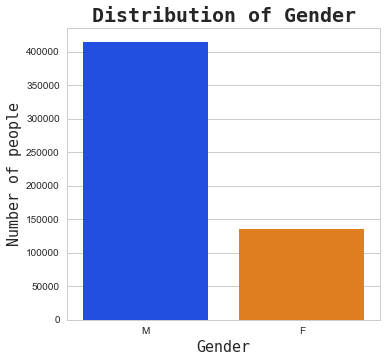

In [29]:
# Gender' barplot
gen = train['Gender'].value_counts()

plt.figure(figsize = (5, 5))
plt.style.use('seaborn-whitegrid')
sns.barplot(gen.index, gen.values, palette = 'bright')
plt.title('Distribution of Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

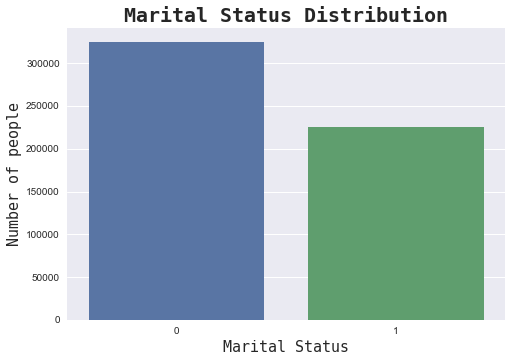

In [33]:
# 'Marital Status' countplot
plt.style.use('seaborn')
plt.figure(figsize = (7, 5))
sns.countplot(train['Marital_Status'])
plt.title('Marital Status Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 10)
plt.show()

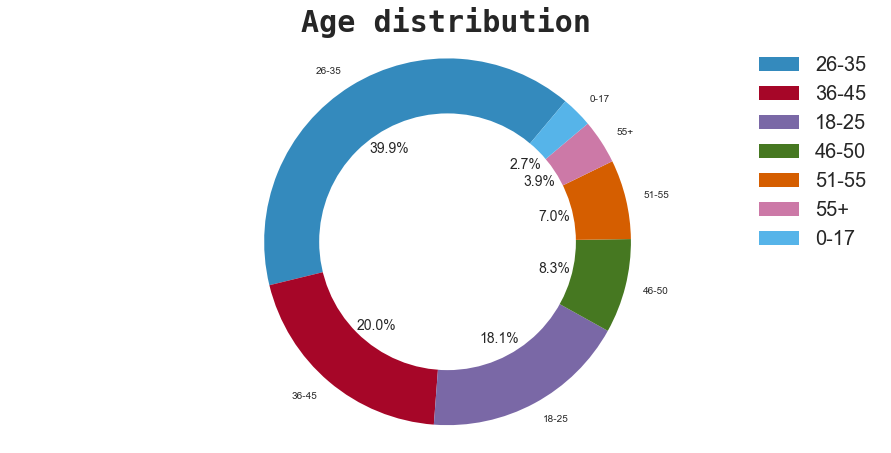

In [34]:
# 'Age' chart
age = train['Age'].value_counts()

plt.style.use('bmh')
plt.figure(figsize = (14, 7))
plt.pie(age.values, labels = age.index, startangle = 50, autopct = '%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.axis('equal')
plt.legend(prop = {'size' : 20})
plt.show()

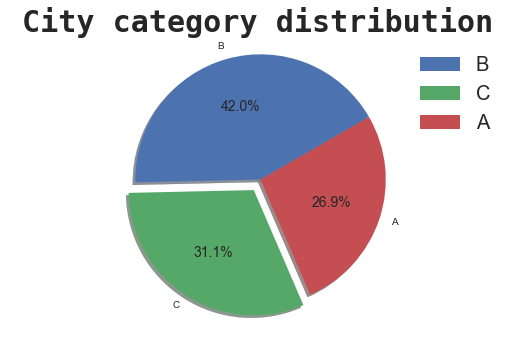

In [35]:
# 'City Category' pie chart
city = train['City_Category'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize = (8, 5))
plt.pie(city.values, labels = city.index, startangle = 30, explode = (0 , 0.10, 0), shadow = True, autopct = '%1.1f%%')
plt.title('City category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.legend()
plt.legend(prop = {'size' : 20})
plt.axis('equal')
plt.show()

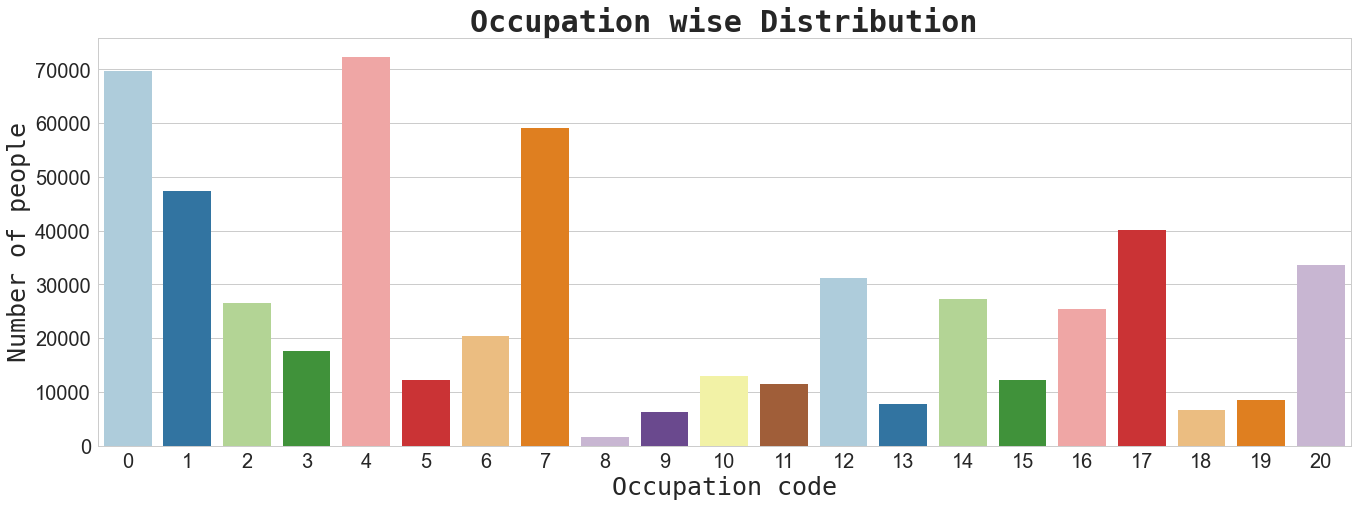

In [36]:
# 'Occupation' char
occupation = train['Occupation'].value_counts()

plt.figure(figsize = (20, 7))
plt.style.use('seaborn-whitegrid')
sns.barplot(occupation.index, occupation.values, palette = 'Paired')
plt.title('Occupation wise Distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 25})
plt.tick_params(labelsize = 20)
plt.show()

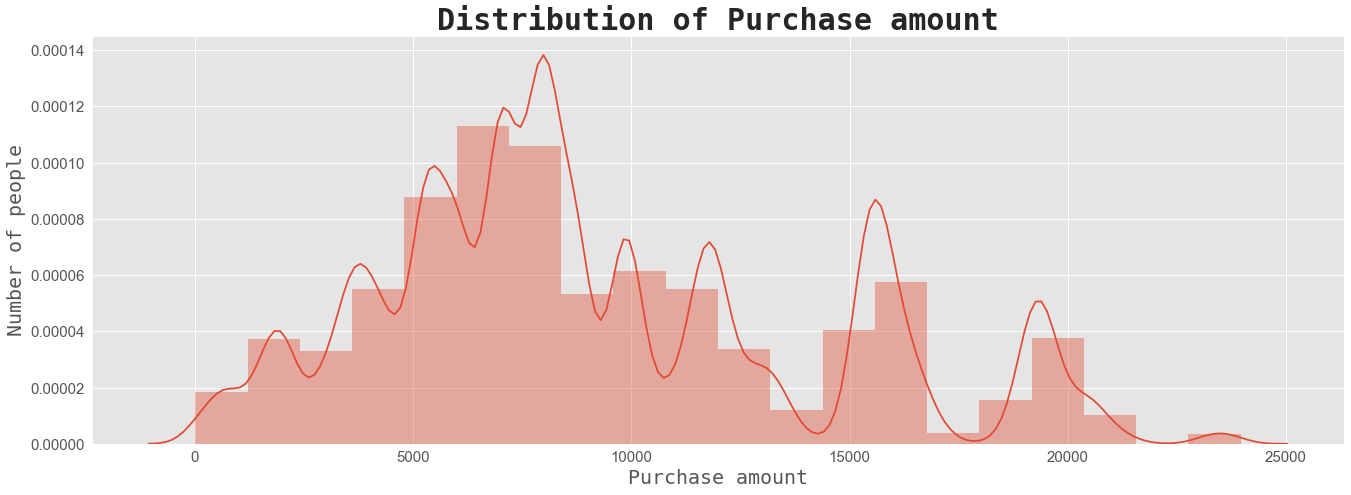

In [37]:
# Creating a distplot for dependent feature 'Purchase'
plt.style.use('ggplot')
plt.figure(figsize = (20, 7))
sns.distplot(train['Purchase'], bins = 20)
plt.title('Distribution of Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.xlabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.ylabel('Number of people', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20})
plt.tick_params(labelsize = 15)
plt.show()

Text(0.5, 1.0, 'Purchase Distribution')

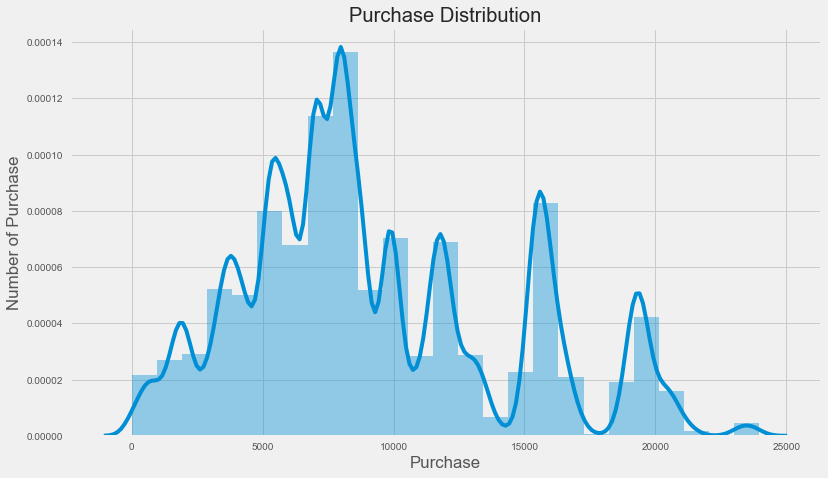

In [38]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(train.Purchase, bins = 25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Purchase")
plt.ylabel("Number of Purchase")
plt.title("Purchase Distribution")

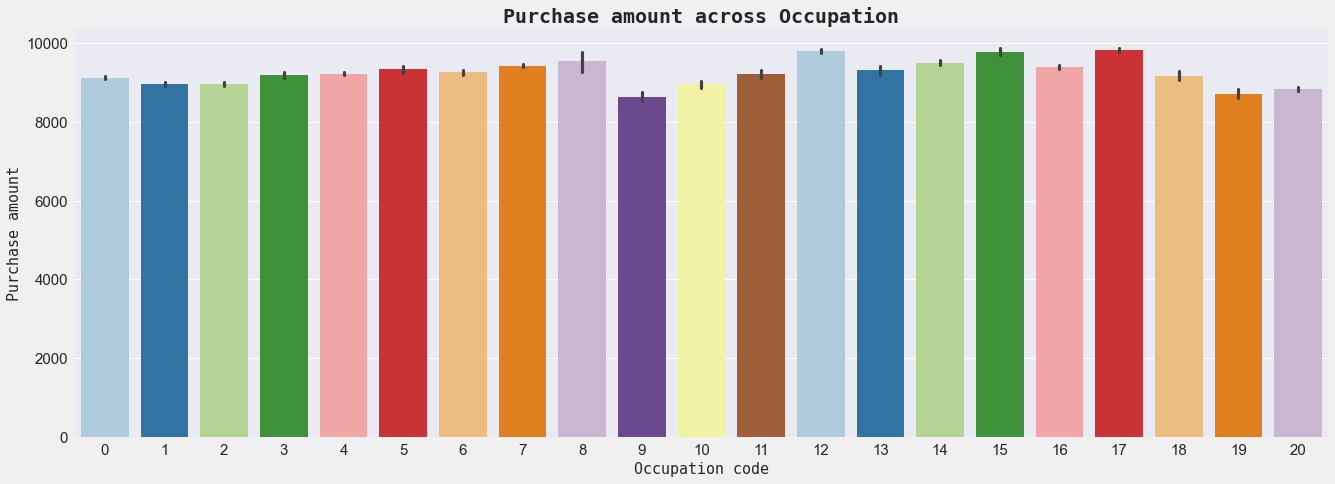

In [40]:
# Creating a barplot of 'Occupation vs Purchase'
plt.figure(figsize = (20, 7))
plt.style.use('seaborn')
sns.barplot(train['Occupation'], train['Purchase'], palette = 'Paired')
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Occupation code', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 15)
plt.show()

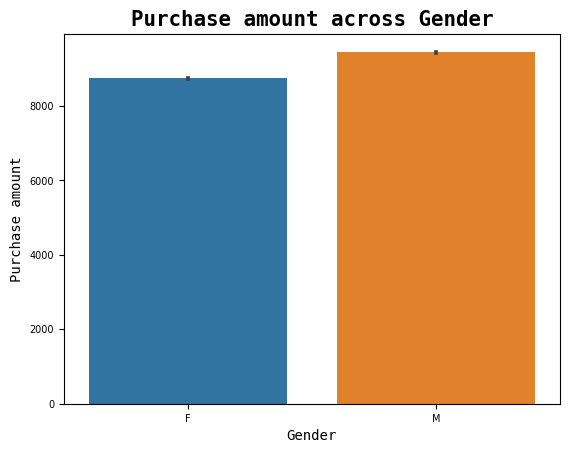

In [41]:
# 'Gender vs Purchase' barplot
plt.style.use('default')
sns.barplot(train['Gender'], train['Purchase'])
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)

plt.show()

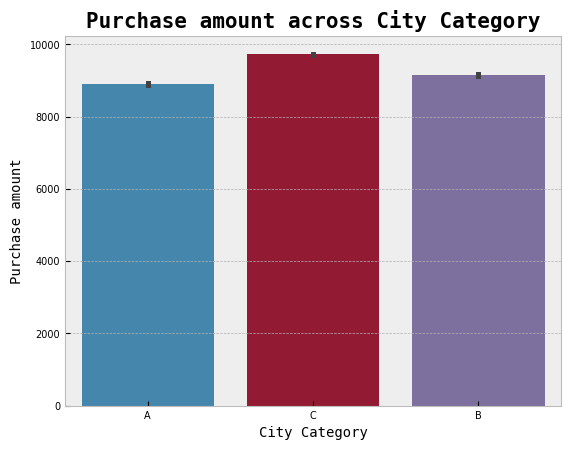

In [22]:
# Creating a barplot of 'City_Category vs Purchase'
plt.style.use('bmh')
sns.barplot(train['City_Category'], train['Purchase'])
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

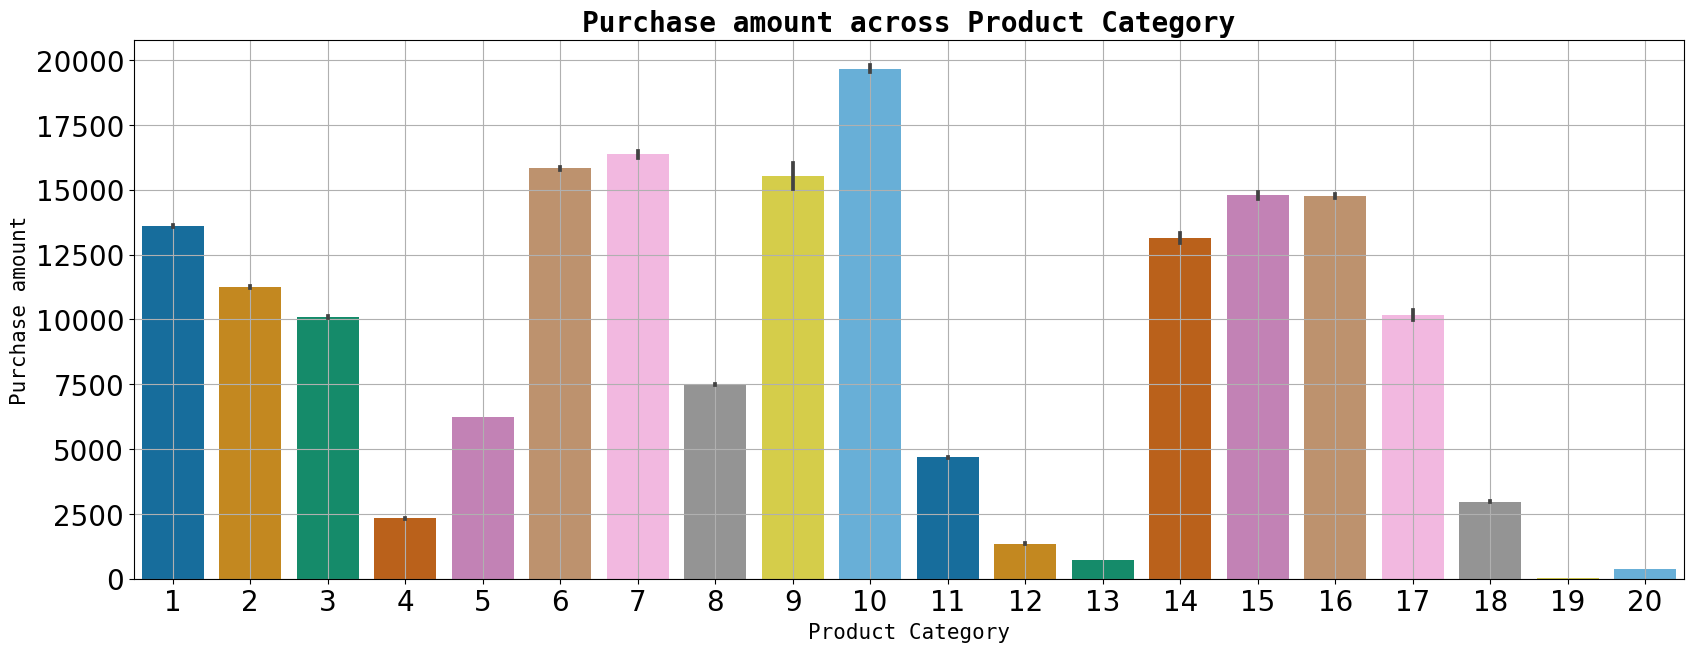

In [23]:
# Creating a barplot of 'Product_Category_1 vs Purchase'
plt.style.use('default')
plt.figure(figsize = (20, 7))
sns.barplot(train['Product_Category_1'], train['Purchase'], palette = 'colorblind')
plt.title('Purchase amount across Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 20, 'fontweight' : 'bold'})
plt.xlabel('Product Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15})
plt.tick_params(labelsize = 20)
plt.grid()
plt.show()

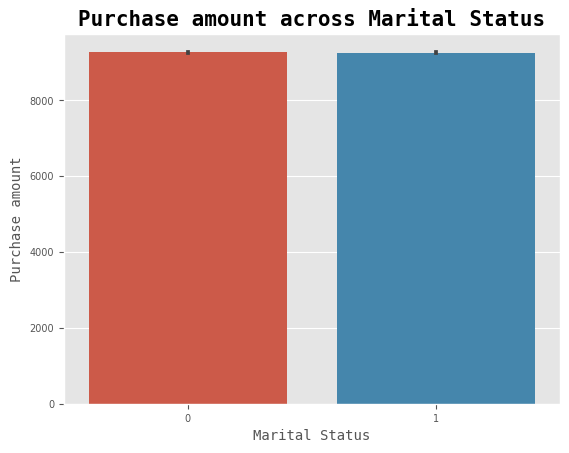

In [24]:
# Creating a barplot of 'Marital Status vs Purchase'
plt.style.use('ggplot')
sns.barplot(train['Marital_Status'], train['Purchase'])
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 15, 'fontweight' : 'bold'})
plt.xlabel('Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.ylabel('Purchase amount', fontdict = {'fontname' : 'Monospace', 'fontsize' : 10})
plt.tick_params(labelsize = 7)
plt.show()

### 2.3 Multivariate Analysis

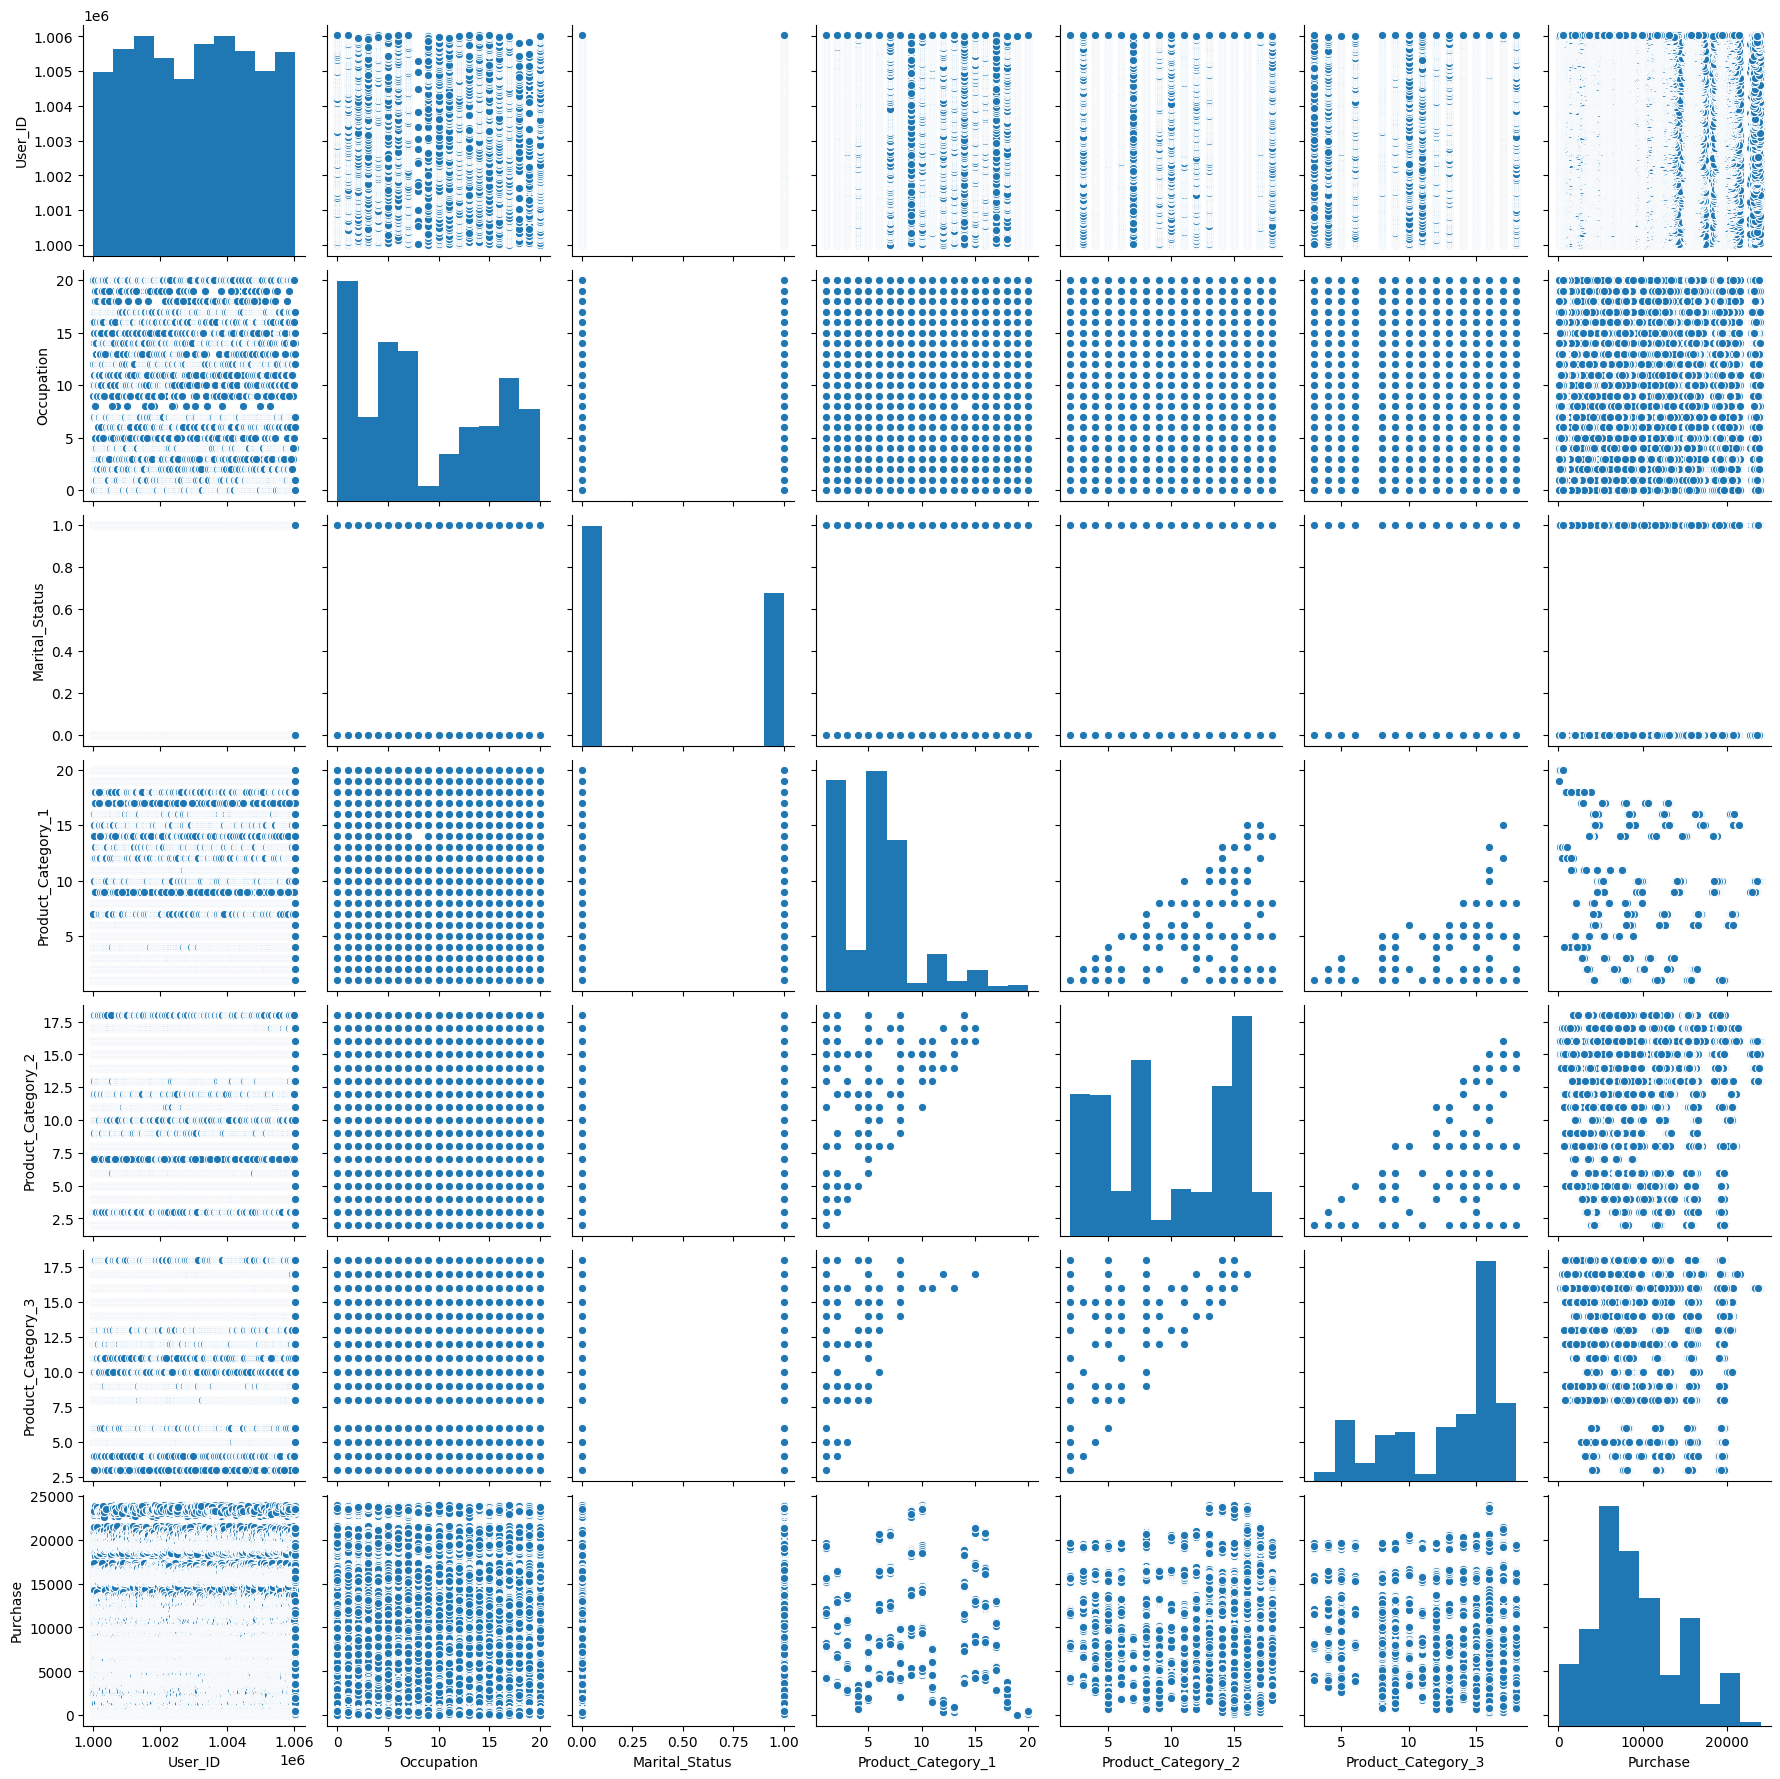

In [25]:
# Creating a Pairplot for all features
plt.style.use('default')
sns.pairplot(train)
plt.show()

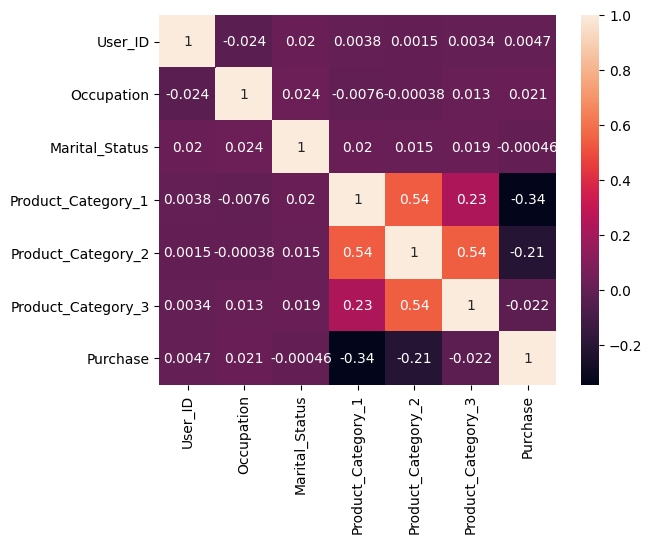

In [26]:
# Creating a heatmap of correlation matrix
sns.heatmap(train.corr(), annot = True)
plt.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
An interesting observation can be made from the gender distribution plot that the number of females was less than the number of men who shopped during Black Friday.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can observe that the dependent feature 'Purchase' is highly correlated with 'Product_Category_1' and 'Product_Category_2'.
</p></li>    

</ul>

</div>

## Data preprocessing

In [27]:
train['source'] = 'train'
test['source'] = 'test'

In [21]:
# train and test mnerge
dataset = pd.concat([train, test])

###  ------------ Juraj Dec 8, 2012 -------- start ----------

###  ------------ Juraj Dec 8, 2012 -------- end ----------